<a href="https://colab.research.google.com/github/GiulioAppetito/Progetto-PMCSN/blob/main/plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math

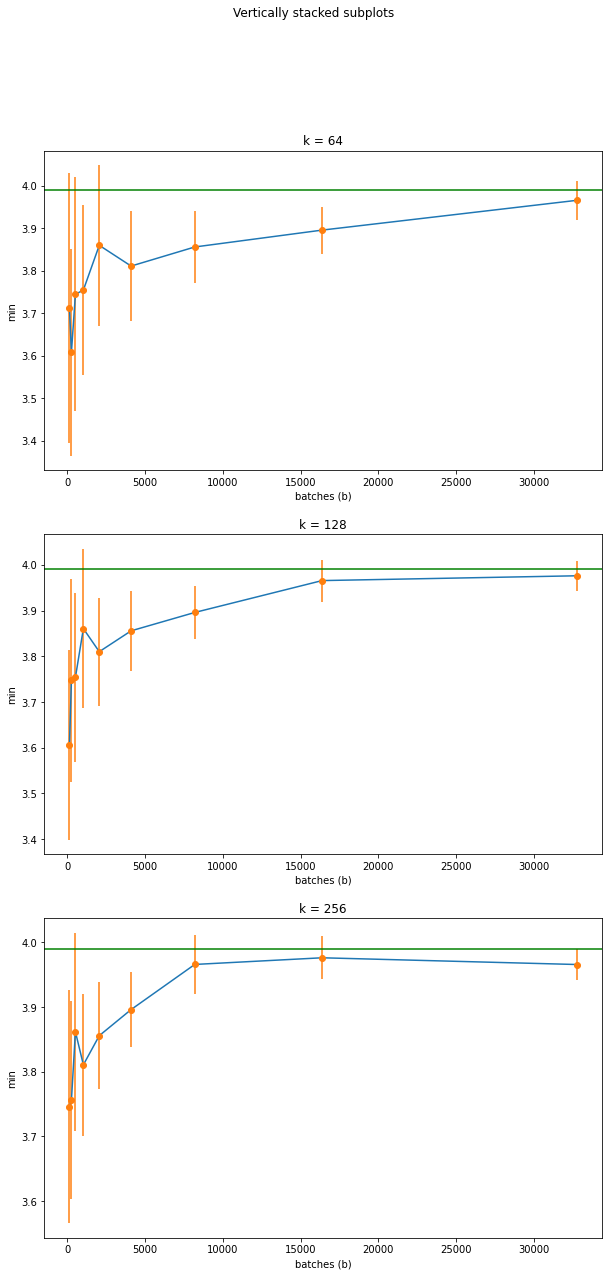

In [3]:
def graficiSceltaBK():
  intervals1 = []
  sample_means1 = []
  x1 = []
  y1 = []

  intervals2 = []
  sample_means2 = []
  x2 = []
  y2 = []

  intervals3 = []
  sample_means3 = []
  x3 = []
  y3 = []

  url = 'https://raw.githubusercontent.com/GiulioAppetito/Progetto-PMCSN/main/outputWaitCinema.csv'
  df = pd.read_csv(url)
  df1 = df[df['k']==64]
  df2 = df[df['k']==128]
  df3 = df[df['k']==256]

  for i in df1.index:
    intervals1.append(df1.loc[i,"interval"])
    sample_means1.append(df1.loc[i,"wait"])
    x1.append(df1.loc[i,"b"])

  for i in df2.index:
    intervals2.append(df2.loc[i,"interval"])
    sample_means2.append(df2.loc[i,"wait"])
    x2.append(df2.loc[i,"b"])

  for i in df3.index:
    intervals3.append(df3.loc[i,"interval"])
    sample_means3.append(df3.loc[i,"wait"])
    x3.append(df3.loc[i,"b"])
  
  # making a simple plot
  y1 =sample_means1
  y2 =sample_means2
  y3 =sample_means3
  
  # creating error
  y_error1 = intervals1
  y_error2 = intervals2
  y_error3 = intervals3
  
  # plotting graph
  fig, (ax1, ax2,ax3) = plt.subplots(3,figsize=(10,20))
  fig.suptitle('Vertically stacked subplots')

  ax1.plot(x1, y1)
  ax1.errorbar(x1, y1,yerr = y_error1,fmt ='o')
  ax1.axhline(y=3.99, color='g', linestyle='-')
  ax1.set_title('k = 64')
  ax1.set_xlabel('batches (b)')
  ax1.set_ylabel('min')

  ax2.plot(x2, y2)
  ax2.errorbar(x2, y2,yerr = y_error2,fmt ='o')
  ax2.axhline(y=3.99, color='g', linestyle='-')
  ax2.set_title('k = 128')
  ax2.set_xlabel('batches (b)')
  ax2.set_ylabel('min')

  ax3.plot(x3, y3)
  ax3.errorbar(x3, y3,yerr = y_error3,fmt ='o')
  ax3.axhline(y=3.99, color='g', linestyle='-')
  ax3.set_title('k = 256')
  ax3.set_xlabel('batches (b)')
  ax3.set_ylabel('min')

graficiSceltaBK()

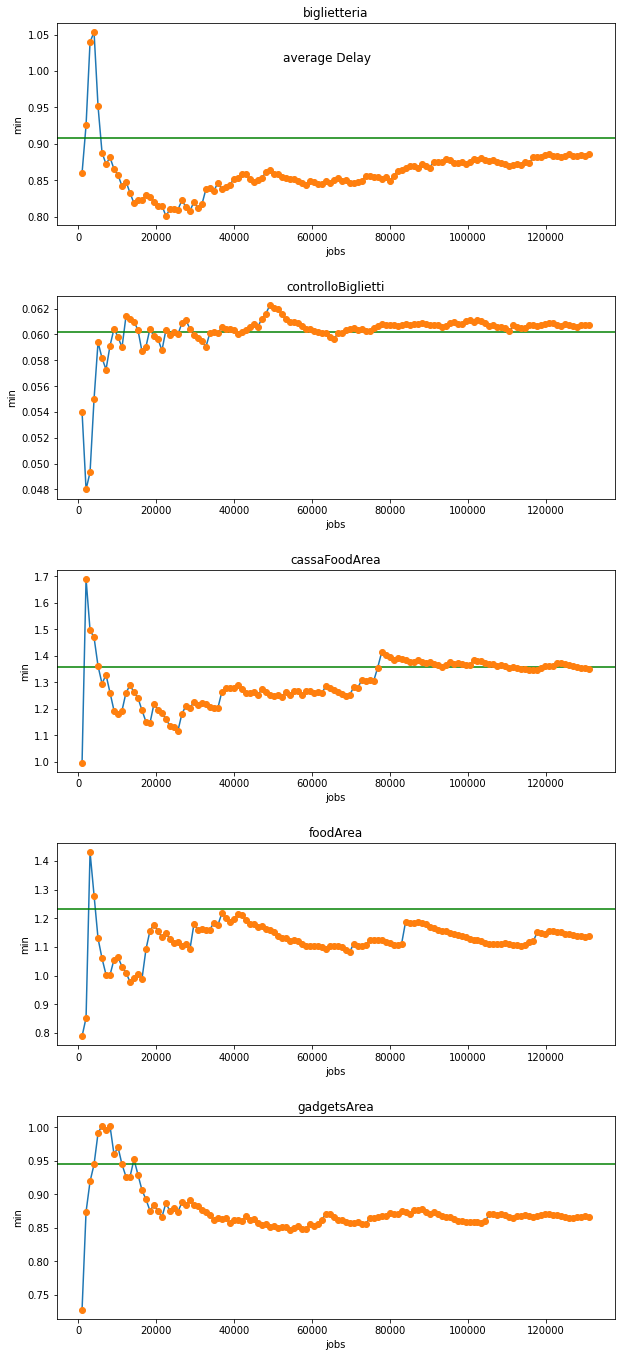

In [55]:
def graficiVerificaDelay():
  intervals1 = []
  sample_means1 = []
  x1 = []
  y1 = []

  intervals2 = []
  sample_means2 = []
  x2 = []
  y2 = []

  intervals3 = []
  sample_means3 = []
  x3 = []
  y3 = []

  intervals4 = []
  sample_means4 = []
  x4 = []
  y4 = []

  intervals5 = []
  sample_means5 = []
  x5 = []
  y5 = []

  url = 'https://raw.githubusercontent.com/GiulioAppetito/Progetto-PMCSN/main/outputVerificaDelay.csv'
  df = pd.read_csv(url)
  df1 = df[df['centro']=='biglietteria']['mean']
  df2 = df[df['centro']=='controlloBiglietti']['mean']
  df3 = df[df['centro']=='cassaFoodArea']['mean']
  df4 = df[df['centro']=='foodArea']['mean']
  df5 = df[df['centro']=='gadgetsArea']['mean']

  incremental_means1 = []
  incremental_means2 = []
  incremental_means3 = []
  incremental_means4 = []
  incremental_means5 = []

  mean = 0.0
  sum = 0.0
  n = 0.0
  jobs = 0.0
  
  for i in range(0, len(df1)):
    data = df1[i]                         
    n+=1                                      
    diff  = data - mean
    sum  += diff * diff * (n - 1.0) / n
    mean += diff / n
    x1.append(n*1024)
    incremental_means1.append(mean)

  mean = 0.0
  sum = 0.0
  n = 0.0
  jobs = 0.0
  for i in df3.index:
    data = df3[i]                         
    n+=1                                      
    diff  = data - mean
    sum  += diff * diff * (n - 1.0) / n
    mean += diff / n
    x3.append(n*1024)
    incremental_means3.append(mean)

  mean = 0.0
  sum = 0.0
  n = 0.0
  jobs = 0.0
  for i in df2.index:
    data = df2[i]                         
    n+=1                                      
    diff  = data - mean
    sum  += diff * diff * (n - 1.0) / n
    mean += diff / n
    x2.append(n*1024)
    incremental_means2.append(mean)

  mean = 0.0
  sum = 0.0
  n = 0.0
  jobs = 0.0
  for i in df4.index:
    data = df4[i]                         
    n+=1                                      
    diff  = data - mean
    sum  += diff * diff * (n - 1.0) / n
    mean += diff / n
    x4.append(n*1024)
    incremental_means4.append(mean)

  mean = 0.0
  sum = 0.0
  n = 0.0
  jobs = 0.0
  for i in df5.index:
    data = df5[i]                         
    n+=1                                      
    diff  = data - mean
    sum  += diff * diff * (n - 1.0) / n
    mean += diff / n
    x5.append(n*1024)
    incremental_means5.append(mean)

  # making a simple plot
  y1 =incremental_means1
  y2 =incremental_means2
  y3 =incremental_means3
  y4 =incremental_means4
  y5 =incremental_means5
  
  # plotting graph
  fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(5,figsize=(10,20))
  fig.suptitle('average Delay')

  ax1.plot(x1, y1)
  ax1.errorbar(x1, y1,fmt ='o')
  ax1.axhline(y=0.908, color='g', linestyle='-')
  ax1.set_title('biglietteria')
  ax1.set_xlabel('jobs')
  ax1.set_ylabel('min')

  ax2.plot(x2, y2)
  ax2.errorbar(x2, y2,fmt ='o')
  ax2.axhline(y=0.0602, color='g', linestyle='-')
  ax2.set_title('controlloBiglietti')
  ax2.set_xlabel('jobs')
  ax2.set_ylabel('min')

  ax3.plot(x3, y3)
  ax3.errorbar(x3, y3,fmt ='o')
  ax3.axhline(y=1.356, color='g', linestyle='-')
  ax3.set_xlabel('jobs')
  ax3.set_title('cassaFoodArea')
  ax3.set_ylabel('min')

  ax4.plot(x4, y4)
  ax4.errorbar(x4, y4,fmt ='o')
  ax4.axhline(y=1.233, color='g', linestyle='-')
  ax4.set_xlabel('jobs')
  ax4.set_title('foodArea')
  ax4.set_ylabel('min')

  ax5.plot(x5, y5)
  ax5.errorbar(x5, y5,fmt ='o')
  ax5.axhline(y=0.946, color='g', linestyle='-')
  ax5.set_xlabel('jobs')
  ax5.set_title('gadgetsArea')
  ax5.set_ylabel('min')
  plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.0 ,
                    wspace=0.2, 
                    hspace=0.35)

graficiVerificaDelay()

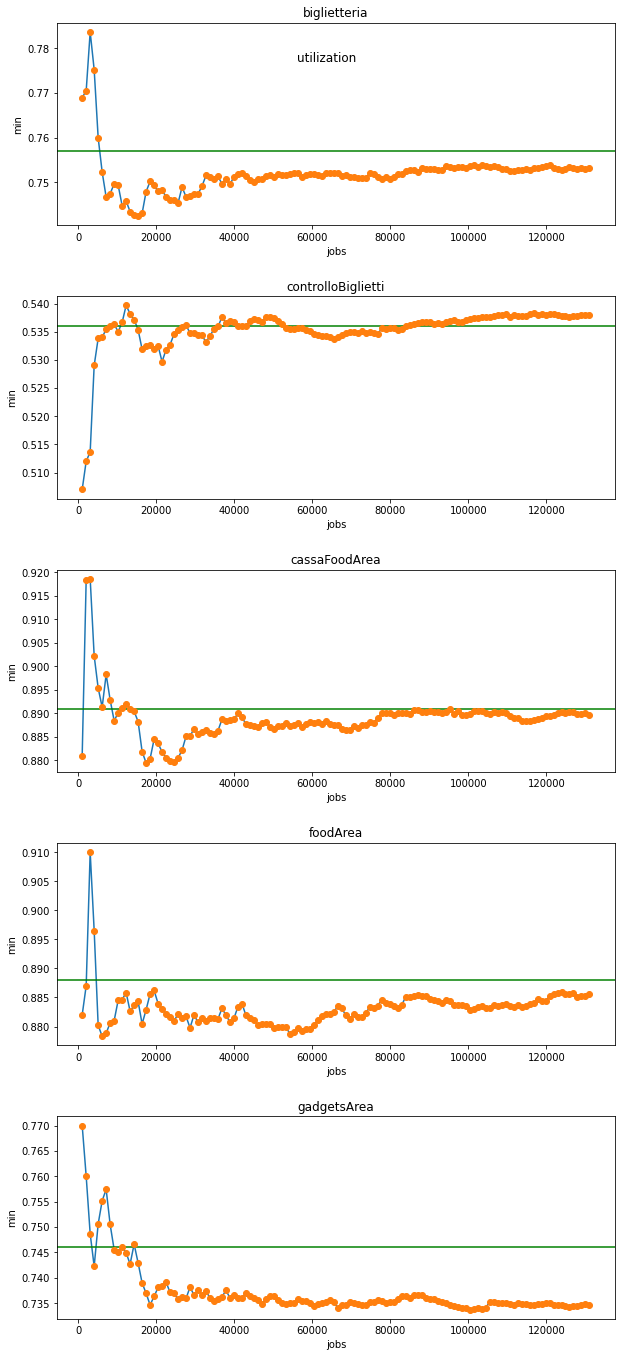

In [57]:
def graficiVerificaUtilization():
  intervals1 = []
  sample_means1 = []
  x1 = []
  y1 = []

  intervals2 = []
  sample_means2 = []
  x2 = []
  y2 = []

  intervals3 = []
  sample_means3 = []
  x3 = []
  y3 = []

  intervals4 = []
  sample_means4 = []
  x4 = []
  y4 = []

  intervals5 = []
  sample_means5 = []
  x5 = []
  y5 = []

  url = 'https://raw.githubusercontent.com/GiulioAppetito/Progetto-PMCSN/main/outputVerificaUtilization.csv'
  df = pd.read_csv(url)
  df1 = df[df['centro']=='biglietteria']['mean']
  df2 = df[df['centro']=='controlloBiglietti']['mean']
  df3 = df[df['centro']=='cassaFoodArea']['mean']
  df4 = df[df['centro']=='foodArea']['mean']
  df5 = df[df['centro']=='gadgetsArea']['mean']

  incremental_means1 = []
  incremental_means2 = []
  incremental_means3 = []
  incremental_means4 = []
  incremental_means5 = []

  mean = 0.0
  sum = 0.0
  n = 0.0
  jobs = 0.0
  
  for i in range(0, len(df1)):
    data = df1[i]                         
    n+=1                                      
    diff  = data - mean
    sum  += diff * diff * (n - 1.0) / n
    mean += diff / n
    x1.append(n*1024)
    incremental_means1.append(mean)

  mean = 0.0
  sum = 0.0
  n = 0.0
  jobs = 0.0
  for i in df3.index:
    data = df3[i]                         
    n+=1                                      
    diff  = data - mean
    sum  += diff * diff * (n - 1.0) / n
    mean += diff / n
    x3.append(n*1024)
    incremental_means3.append(mean)

  mean = 0.0
  sum = 0.0
  n = 0.0
  jobs = 0.0
  for i in df2.index:
    data = df2[i]                         
    n+=1                                      
    diff  = data - mean
    sum  += diff * diff * (n - 1.0) / n
    mean += diff / n
    x2.append(n*1024)
    incremental_means2.append(mean)

  mean = 0.0
  sum = 0.0
  n = 0.0
  jobs = 0.0
  for i in df4.index:
    data = df4[i]                         
    n+=1                                      
    diff  = data - mean
    sum  += diff * diff * (n - 1.0) / n
    mean += diff / n
    x4.append(n*1024)
    incremental_means4.append(mean)

  mean = 0.0
  sum = 0.0
  n = 0.0
  jobs = 0.0
  for i in df5.index:
    data = df5[i]                         
    n+=1                                      
    diff  = data - mean
    sum  += diff * diff * (n - 1.0) / n
    mean += diff / n
    x5.append(n*1024)
    incremental_means5.append(mean)

  # making a simple plot
  y1 =incremental_means1
  y2 =incremental_means2
  y3 =incremental_means3
  y4 =incremental_means4
  y5 =incremental_means5
  
  # plotting graph
  fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(5,figsize=(10,20))
  fig.suptitle('utilization')

  ax1.plot(x1, y1)
  ax1.errorbar(x1, y1,fmt ='o')
  ax1.axhline(y=0.757, color='g', linestyle='-')
  ax1.set_title('biglietteria')
  ax1.set_xlabel('jobs')
  ax1.set_ylabel('min')

  ax2.plot(x2, y2)
  ax2.errorbar(x2, y2,fmt ='o')
  ax2.axhline(y=0.536, color='g', linestyle='-')
  ax2.set_title('controlloBiglietti')
  ax2.set_xlabel('jobs')
  ax2.set_ylabel('min')

  ax3.plot(x3, y3)
  ax3.errorbar(x3, y3,fmt ='o')
  ax3.axhline(y=0.891, color='g', linestyle='-')
  ax3.set_xlabel('jobs')
  ax3.set_title('cassaFoodArea')
  ax3.set_ylabel('min')

  ax4.plot(x4, y4)
  ax4.errorbar(x4, y4,fmt ='o')
  ax4.axhline(y=0.888, color='g', linestyle='-')
  ax4.set_xlabel('jobs')
  ax4.set_title('foodArea')
  ax4.set_ylabel('min')

  ax5.plot(x5, y5)
  ax5.errorbar(x5, y5,fmt ='o')
  ax5.axhline(y=0.746, color='g', linestyle='-')
  ax5.set_xlabel('jobs')
  ax5.set_title('gadgetsArea')
  ax5.set_ylabel('min')
  plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.0 ,
                    wspace=0.2, 
                    hspace=0.35)

graficiVerificaUtilization()

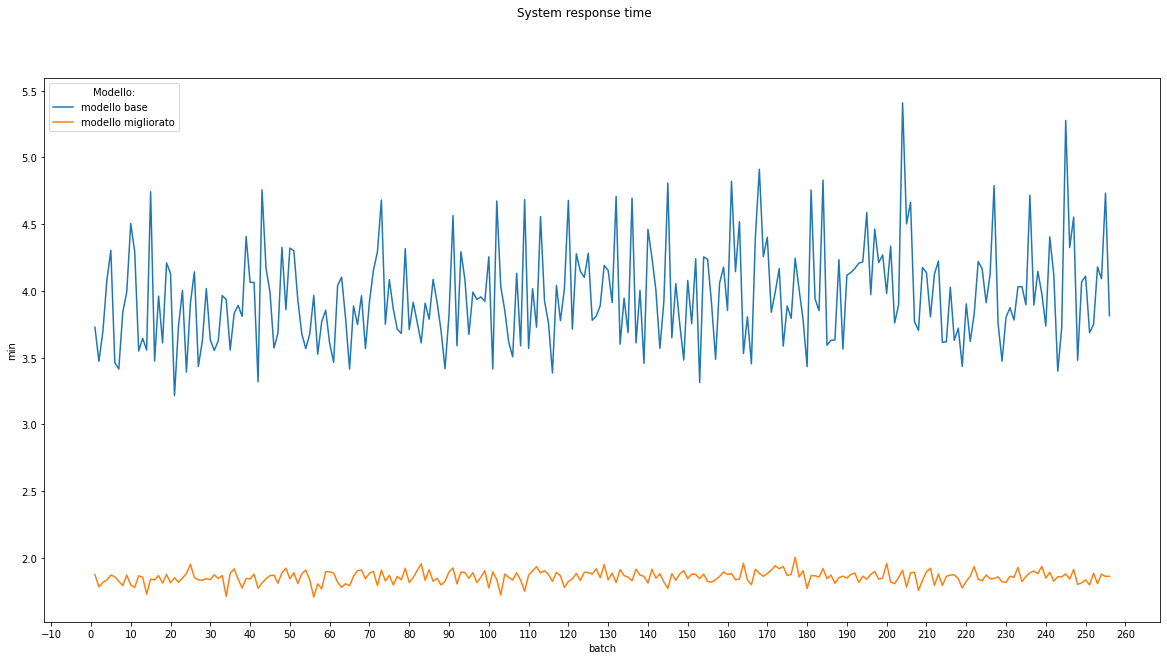

In [77]:
def graficiVerificaUtilization():
  intervals1 = []
  sample_means1 = []
  x1 = []
  y1 = []

  intervals2 = []
  sample_means2 = []
  x2 = []
  y2 = []


  url = 'https://raw.githubusercontent.com/GiulioAppetito/Progetto-PMCSN/main/baseSystemWait.csv'
  dfb = pd.read_csv(url)
  df1 = dfb['wait']
  
  
  url = 'https://raw.githubusercontent.com/GiulioAppetito/Progetto-PMCSN/main/miglioratoSystemWait.csv'
  dfm = pd.read_csv(url)
  df2 = dfm['wait']

  means1 = []
  means2 = []

  n = 0.0

  for i in range(0, len(df1)):
    n+=1
    data = df1[i]   
    jobs = n*8192                      
    x1.append(n)
    means1.append(data)

  n = 0.0
  for i in df2.index:
    n+=1
    data = df2[i]  
    jobs = n*8192                                                  
    x2.append(n)
    means2.append(data)



  # making a simple plot
  y1 =means1
  y2 =means2
  
  # plotting graph
  import matplotlib.ticker as plticker
  fig, ax1 = plt.subplots(1,figsize=(20,10))
  fig.suptitle('System response time')
  ax1.plot(x1, y1, label='modello base')
  ax1.plot(x2, y2, label = 'modello migliorato')
  loc = plticker.MultipleLocator(base=10.0) # this locator puts ticks at regular intervals
  ax1.xaxis.set_major_locator(loc)
  
  ax1.legend(title='Modello:',loc='upper left')
  
  ax1.set_xlabel('batch')
  ax1.set_ylabel('min')

  

graficiVerificaUtilization()